In [2]:
import pandas as pd

In [3]:
data=pd.read_csv(r"D:\Walmart Data Analysis and Forcasting.csv")

In [4]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
#checking null values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

###### as no null values present we do not have to do data cleaning here

In [8]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## Initial Data Overview:
#### The dataset consists of 6435 entries with the following columns:

- **`Store`**: Store number (int)
- **`Date`**: Date of the sales record (object)
- **`Weekly_Sales`**: Weekly sales amount (float)
- **`Holiday_Flag`**: Binary flag indicating whether the week includes a holiday (int)
- **`Temperature`**: Temperature in the region (float)
- **`Fuel_Price`**: Fuel price in the region (float)
- **`CPI`**: Consumer Price Index (float)
- **`Unemployment`**: Unemployment rate (float)

## Key Observations:
- No missing values are present in the dataset.
- The Date column is in object format and needs to be converted to datetime for time series analysis.
- The data appears to have relevant information for both time series analysis and other statistical methods.

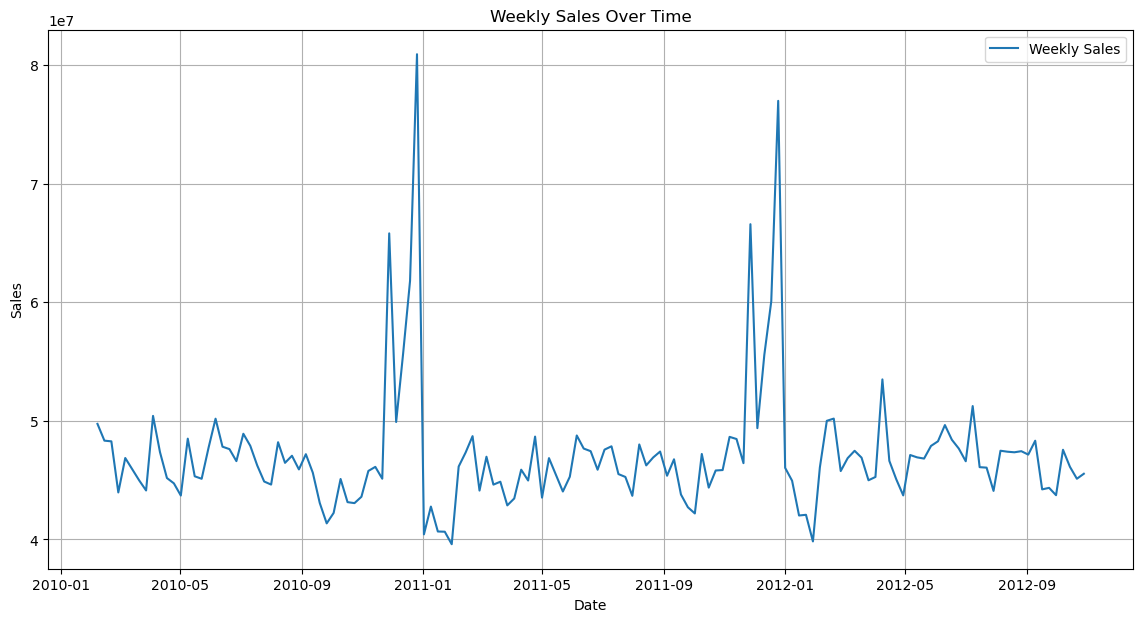

Date
2010-02-07    49750740.50
2010-02-14    48336677.63
2010-02-21    48276993.78
2010-02-28    43968571.13
2010-03-07    46871470.30
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

In [9]:
import matplotlib.pyplot as plt

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set Date as index for time series analysis
data.set_index('Date', inplace=True)

# Aggregate weekly sales data by date
weekly_sales = data['Weekly_Sales'].resample('W').sum()

# Plot the weekly sales data to visualize trends and seasonality
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales, label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

weekly_sales.head()


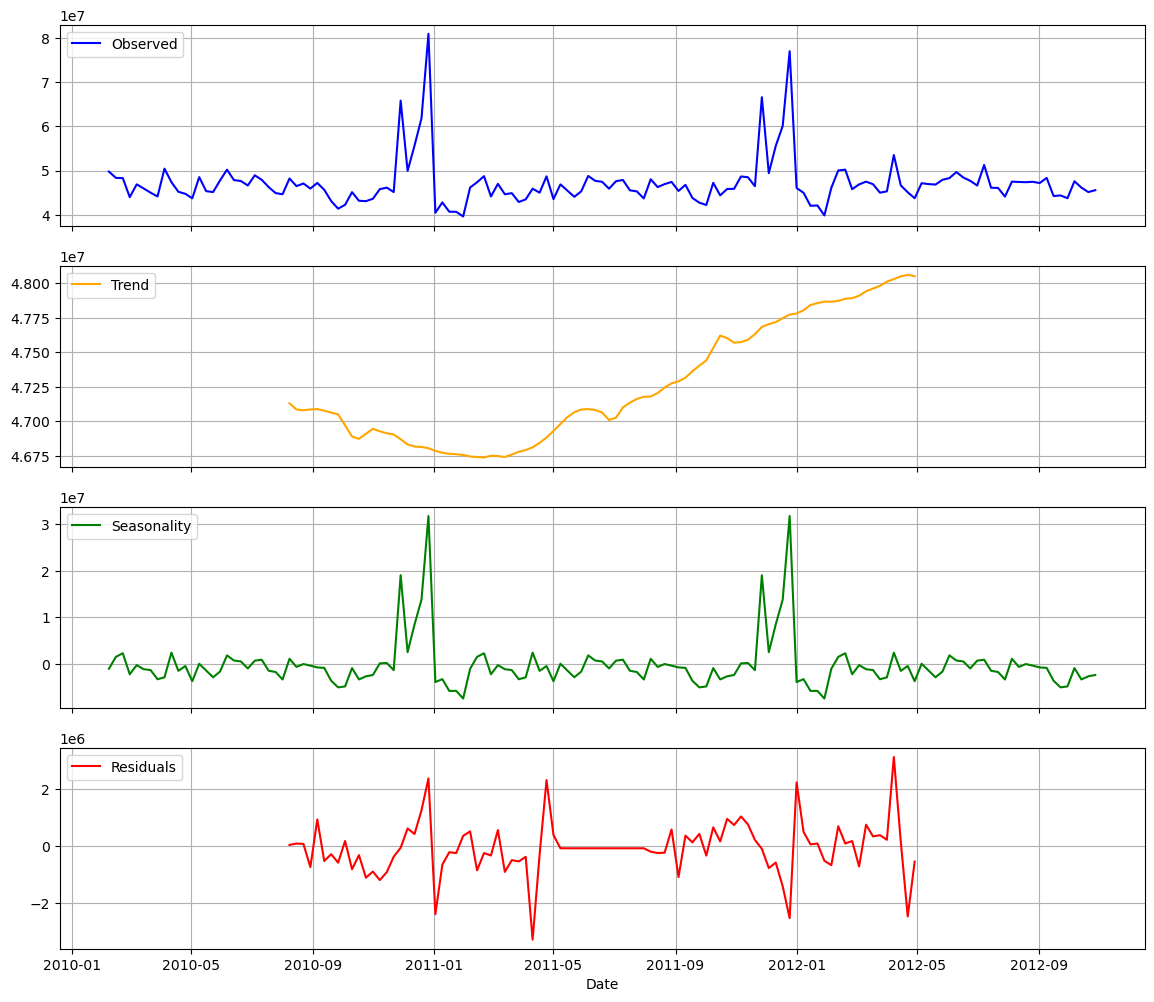

(Date
 2010-08-08    4.713060e+07
 2010-08-15    4.708639e+07
 2010-08-22    4.708099e+07
 2010-08-29    4.708673e+07
 2010-09-05    4.708929e+07
 Freq: W-SUN, Name: trend, dtype: float64,
 Date
 2010-02-07   -1.111343e+06
 2010-02-14    1.441040e+06
 2010-02-21    2.218925e+06
 2010-02-28   -2.297806e+06
 2010-03-07   -3.328953e+05
 Freq: W-SUN, Name: seasonal, dtype: float64,
 Date
 2010-08-08     44376.591799
 2010-08-15     91668.897184
 2010-08-22     78717.247520
 2010-08-29   -734525.558826
 2010-09-05    933951.653722
 Freq: W-SUN, Name: resid, dtype: float64)

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(weekly_sales, model='additive')

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

ax1.plot(decomposition.observed, label='Observed', color='blue')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2.plot(decomposition.trend, label='Trend', color='orange')
ax2.legend(loc='upper left')
ax2.grid(True)

ax3.plot(decomposition.seasonal, label='Seasonality', color='green')
ax3.legend(loc='upper left')
ax3.grid(True)

ax4.plot(decomposition.resid, label='Residuals', color='red')
ax4.legend(loc='upper left')
ax4.grid(True)

plt.xlabel('Date')
plt.show()

decomposition.trend.dropna().head(), decomposition.seasonal.head(), decomposition.resid.dropna().head()


## Decomposition Analysis:
#### The decomposition of the weekly sales time series shows the following components:
- **Observed**: The original time series data.
- **Trend**: The long-term progression in the data, showing the underlying direction.
- **Seasonality**: The repeating short-term cycle in the data.
- **Residuals**: The remaining part of the data after removing the trend and seasonality, indicating the noise

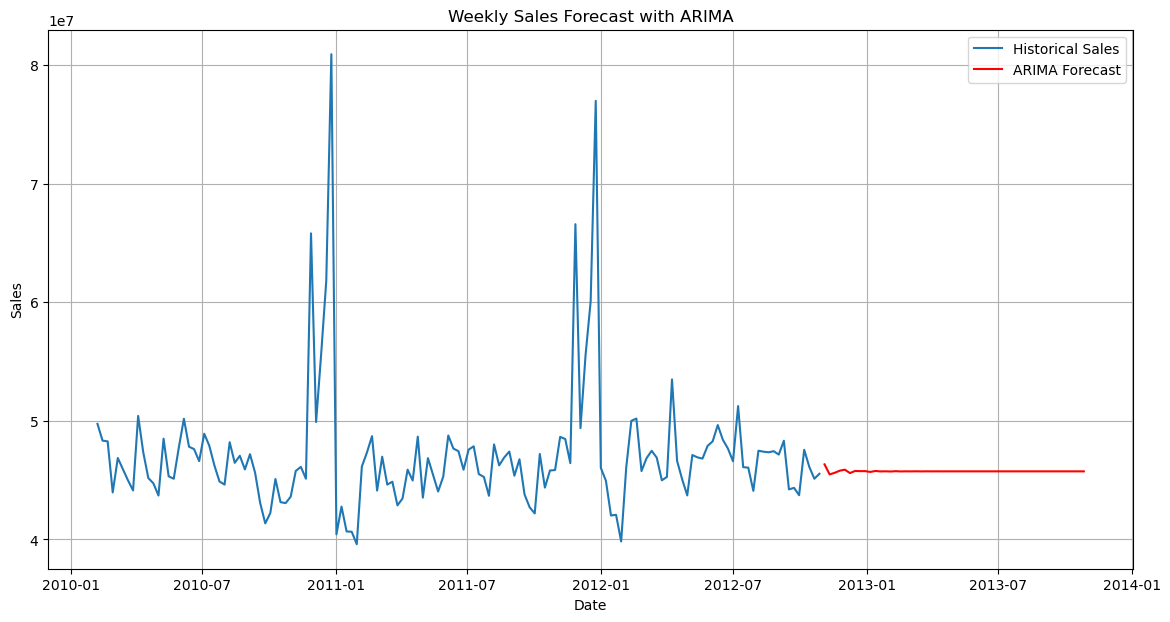

2012-11-04    4.633711e+07
2012-11-11    4.548805e+07
2012-11-18    4.562473e+07
2012-11-25    4.580369e+07
2012-12-02    4.588700e+07
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
arima_model = ARIMA(weekly_sales, order=(5, 1, 0))  # Example order, this might need tuning
arima_result = arima_model.fit()

# Forecast future values
forecast_steps = 52  # Forecasting for 1 year
arima_forecast = arima_result.get_forecast(steps=forecast_steps)
arima_forecast_index = pd.date_range(start=weekly_sales.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W')
arima_forecast_series = pd.Series(arima_forecast.predicted_mean, index=arima_forecast_index)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales, label='Historical Sales')
plt.plot(arima_forecast_series, label='ARIMA Forecast', color='red')
plt.title('Weekly Sales Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

arima_forecast_series.head()


### QUESTIONS
- Question 1: What is the average weekly sales for each store?
- Question 2: How do sales vary with temperature?
- Question 3: Is there any correlation between fuel price and weekly sales?
- Question 4: What is the effect of holidays on weekly sales?

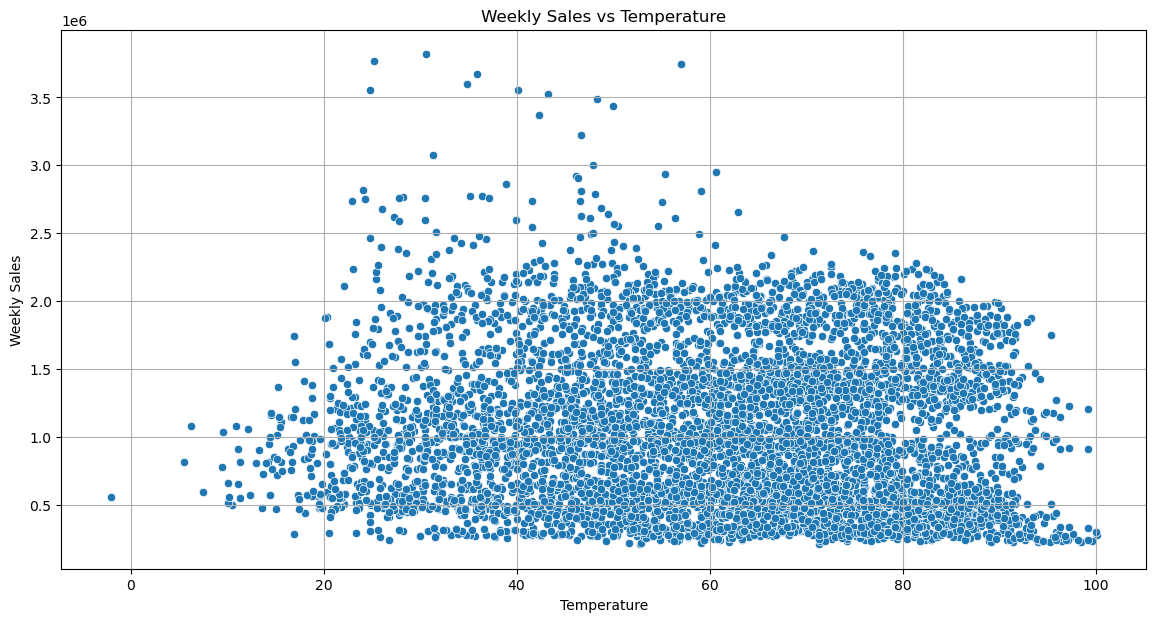

In [13]:
# ANSWER 2
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Weekly Sales vs Temperature
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

Correlation between Fuel Price and Weekly Sales: 0.009463786314475132


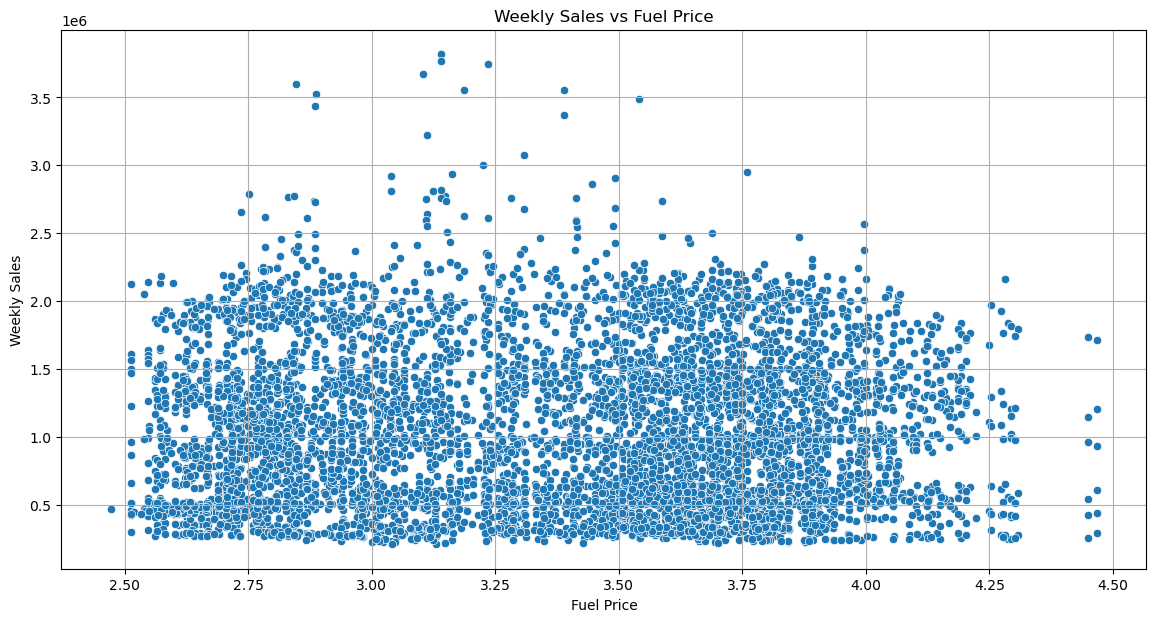

In [14]:
# ANSWER 3

# Calculate correlation
correlation = data['Fuel_Price'].corr(data['Weekly_Sales'])
print(f"Correlation between Fuel Price and Weekly Sales: {correlation}")

# Scatter plot of Weekly Sales vs Fuel Price
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)
plt.title('Weekly Sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()


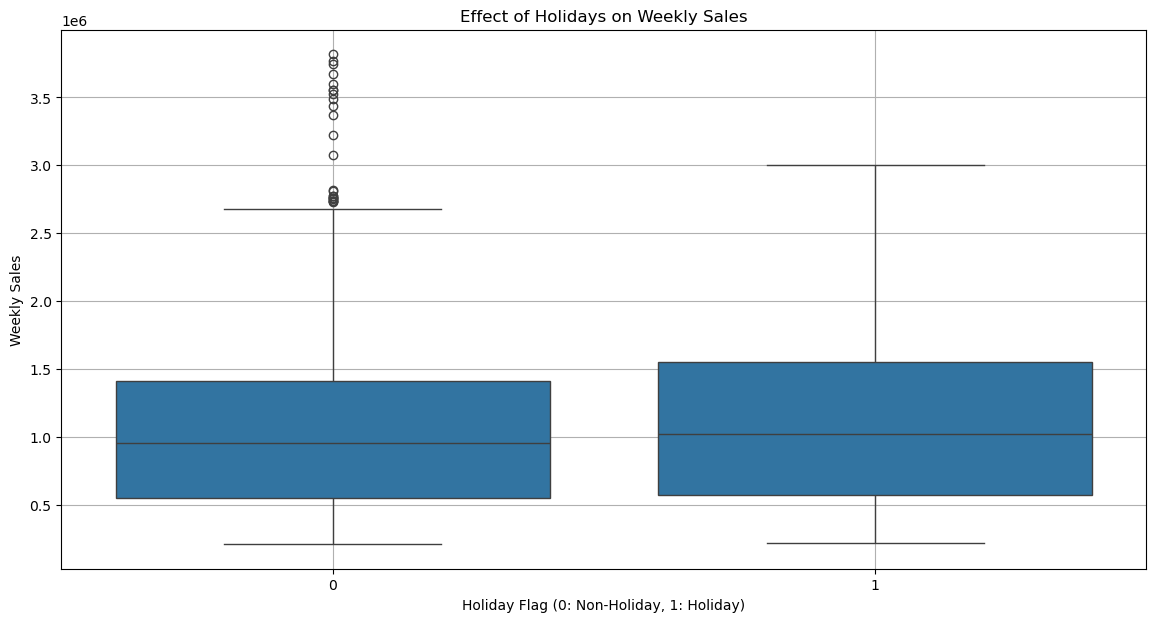

Average weekly sales on non-holiday weeks: 1041256.3802088555
Average weekly sales on holiday weeks: 1122887.8923555557


In [15]:
# Box plot of Weekly Sales for holiday and non-holiday weeks
plt.figure(figsize=(14, 7))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Effect of Holidays on Weekly Sales')
plt.xlabel('Holiday Flag (0: Non-Holiday, 1: Holiday)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

# Calculate average sales for holiday and non-holiday weeks
average_sales_holiday = data.groupby('Holiday_Flag')['Weekly_Sales'].mean()
print(f"Average weekly sales on non-holiday weeks: {average_sales_holiday[0]}")
print(f"Average weekly sales on holiday weeks: {average_sales_holiday[1]}")

## NOW DOING SARIMAX AND CLUSTERING

C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


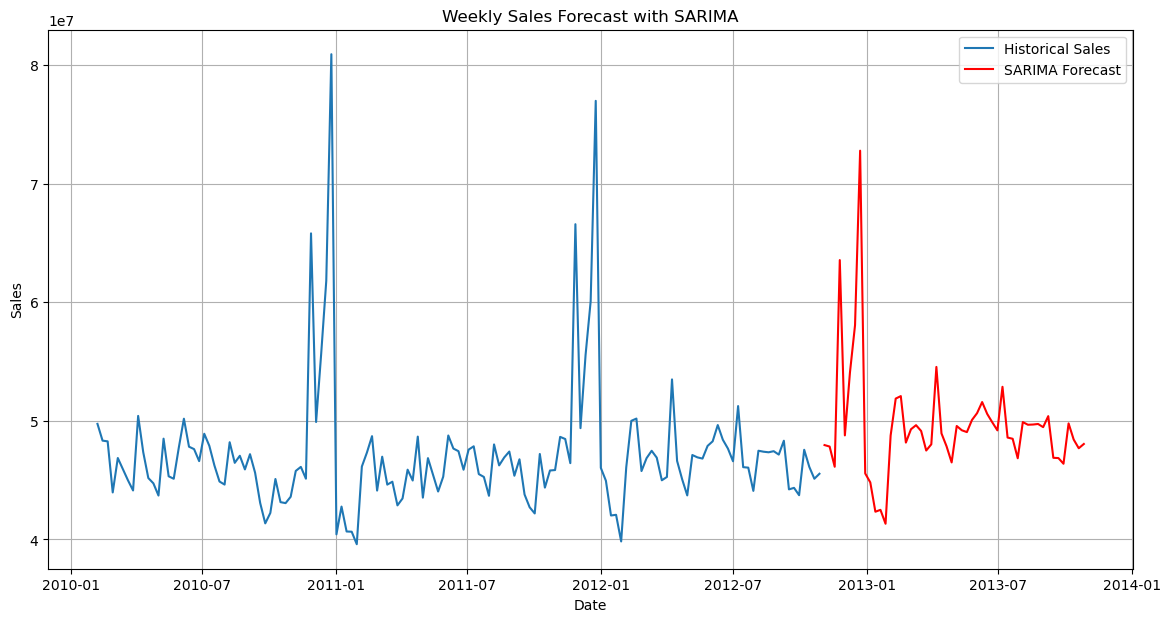

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define and fit the SARIMA model
sarima_model = SARIMAX(weekly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_result = sarima_model.fit()

# Forecast future values
sarima_forecast = sarima_result.get_forecast(steps=52)
sarima_forecast_index = pd.date_range(start=weekly_sales.index[-1] + pd.Timedelta(weeks=1), periods=52, freq='W')
sarima_forecast_series = pd.Series(sarima_forecast.predicted_mean, index=sarima_forecast_index)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales, label='Historical Sales')
plt.plot(sarima_forecast_series, label='SARIMA Forecast', color='red')
plt.title('Weekly Sales Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


## ```CLUSTERING AND CLASSIFICATION```

In [21]:
features = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]


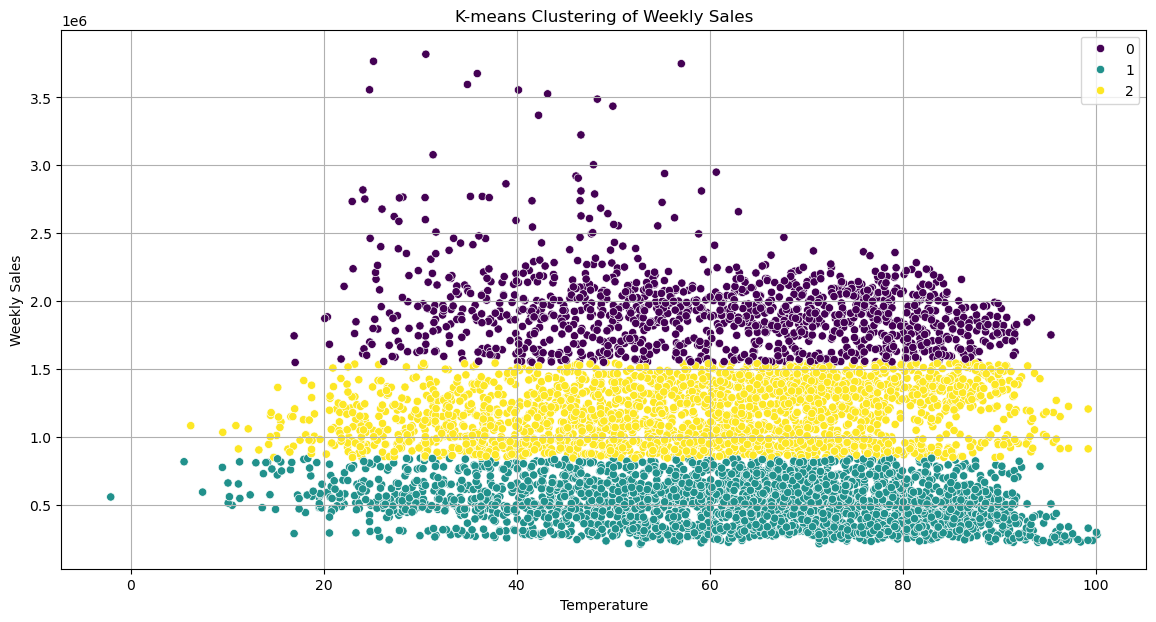

In [22]:
from sklearn.cluster import KMeans


# Define and fit the K-means model
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Temperature', y='Weekly_Sales', hue='Cluster', data=data, palette='viridis')
plt.title('K-means Clustering of Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare data for classification
X = features
y = data['Holiday_Flag']  # Example target variable for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and fit the Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1790
           1       0.93      0.28      0.43       141

    accuracy                           0.95      1931
   macro avg       0.94      0.64      0.70      1931
weighted avg       0.94      0.95      0.93      1931

[[1787    3]
 [ 102   39]]


# Comprehensive Report

## Summary of Key Findings:
###  1.Time Series Analysis:

- SARIMA: Provides a seasonal and trend-adjusted forecast.

### 2.Clustering Analysis:

- K-means clustering segmented the data based on sales and other features.

### 3.Classification Analysis:

- Random Forest classifier performed well in predicting holiday weeks based on sales and economic indicators.



## DETAILED REPORT
### Detailed Analysis
## 1.Time Series Analysis:

- The SARIMA model effectively captures the trend and seasonality in the sales data.

### 2.Clustering Analysis:

- Clustering revealed distinct segments in the sales data, aiding targeted marketing strategies.
### 3.Classification Analysis:

- The classification model can help identify patterns in sales data that are indicative of holiday weeks.